## Chapitre: 1 Data Science
#### Vecteurs

In [1]:
height_weight_age = [70, 170, 40]
grades = [95, 80, 75, 62]


### *Comprehension et implementation*

In [2]:
def vector_add(v, w):
    """Ajoutons les elements correspondants"""
    return [v_i + w_i for v_i, w_i in zip(v, w)]


In [3]:
def vector_substract(v, w):
    """Ajoutons les elements correspondants"""
    return [v_i - w_i for v_i, w_i in zip(v, w)]


In [4]:
def vector_sum(vectors):
    """Fait la somme de tous les elements correspondants"""
    result = vectors[0]
    for vector in vectors[0]:
        result = vector_add(result, vector)
    return result


In [5]:
def scalar_multiply(c, v):
    """Nous implementons un scalaire"""
    return [c * v_i for v_i in v]


In [6]:
def vector_mean(vectors):
    """Calculons le vecteur dont le ieme est la moyenne des iemes elements des vecteurs d'entree"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))


In [7]:
def dot(v, w):
    """Calculons le produit Scalaire"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))


In [8]:
def sum_of_squares(v):
    """Calculons la sommes des carres: v_i * v_i + ... + v_n * v_n"""
    return dot(v, v)


In [9]:
import math
def magnitude(v):
    """Nous importont la function Math pour utiliser l'erreur quadratique moyenne"""
    return math.sqrt(sum_of_squares(v))


In [10]:
def squared_distance(v, w):
    """Calculons la distance des carrer (v_1 - w_1)^2+..."""
    return sum_of_squares(vector_substract(v, w))


In [11]:
def distance(v, w):
    """Calculons la distance"""
    return math.sqrt(squared_distance(v, w))


### Matrices
pas convactions ils sont noter en *Maj*

In [12]:
A = [[1, 2, 3],
     [4, 5, 6]]

B = [[1, 2],
     [3, 4],
     [5, 6]]


In [13]:
def shape(A):
    """La taille de notre liste"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols


In [14]:
def get_row(A, i):
    return A[i]

def get_colmn(A, j):
    return [A_i[j] for A_i in A]


In [15]:
def make_matrix(num_rows, num_cols, entry_fn):
    """Retournons une matrice num_rows X num_cols matrice dont l'entree de rang (i, j) est l'entree _fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_cols)]


In [16]:
def is_diagonal(i, j):
    """Creer une matrice identite des 1 sur la diagonale et des o partout ailleurs"""
    return 1 if i == j else 0


In [17]:
identity_matrix = make_matrix(5, 5, is_diagonal)
identity_matrix


[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

### Statistique

In [18]:
def mean(x):
    """Calculons la moyenne"""
    return sum(x) / len(x)


In [19]:
def mediane(v):
    """Trouvons la valeur la plus au milieu de v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # si impair, retournons la valeur du milieu
        return sorted_v[midpoint]
    else:
        # si pair, retournons la valeur du milieu
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2


In [20]:
def quantile(x, p):
    """Trouvons le percentile peme dans x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]


In [21]:
from collections import Counter


In [22]:
def mode(x):
    """Retournons une liste, peut concerner plus d'un mode"""
    counts = Counter(x)
    max_counter = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_counter]


In [23]:
def data_range(x):
    """Nous retournons la dispersion"""
    return max(x) - min(x)


In [24]:
def de_mean(x):
    """Fait glisser x en retranchant sa moyenne (de sorte que le resultat donne la moyenne 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]


In [25]:
def variance(x):
    """Suppose que x a au moins deux elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)


In [26]:
def standard_deviation(x):
    """Retournons l'ecart-type"""
    return math.sqrt(variance(x))


In [27]:
def interquartile_range(x):
    """Retournons la differences entre les valeurs"""
    return quantile(x, 0.75) - quantile(x, 0.25)


In [28]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)


In [29]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0
    

#### Chausse-trappes

In [30]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]


In [31]:
mean(x)


0.0

In [32]:
mean(y)


1.2

In [33]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]


In [34]:
mean(x)


0.0

In [35]:
mean(y)


100.0

In [36]:
# page 81


### Correlation et Causalite
- quand ont parle de causalite c'est une manier de dire que une situation provient d'un autre et que sans cela il aurait pas de cause a un fait
- la `correlation` est une maniere dire que un evenement correspond a un evenement donner

### Probabilites
- les lois de probabilite, si vraies en general, si fallacieuses en particulier

In [37]:
import random


In [38]:
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(1000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)


P(both | older): 0.4949290060851927
P(both | either): 0.32232496697490093


### Le theoreme de Bayes

In [39]:
def uniform_cdf(x):
    """Retournons la probabilite q'une distribution aleatoire est <= x"""
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1


### Distribution normale

In [40]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))


In [41]:
import matplotlib.pyplot as plt


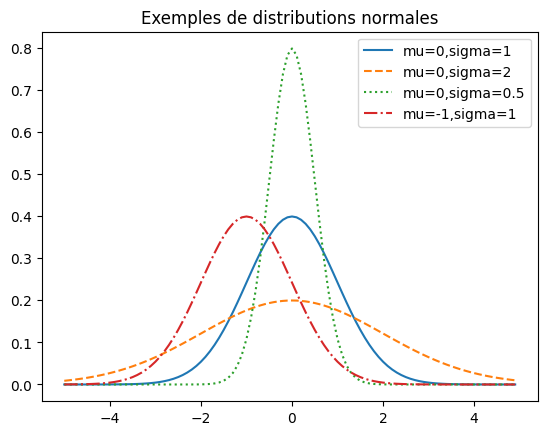

In [42]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Exemples de distributions normales")
plt.show()


### loi normal standard

In [43]:
def normal_cdf(x, mu=0, sigma=1):
    if sigma == 0:
        raise ValueError("L'écart-type (sigma) ne peut pas être nul")
    return (1 + math.erf((x - mu) / (sigma * math.sqrt(2)))) / 2



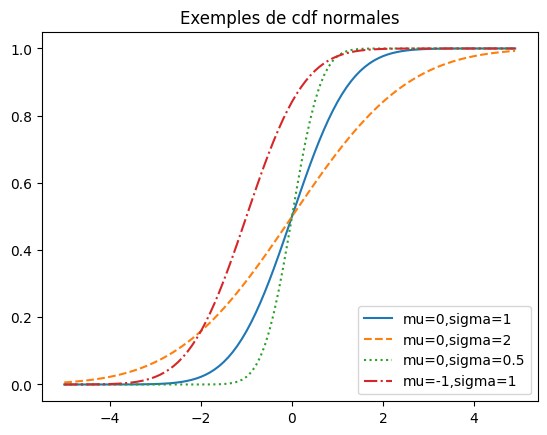

In [44]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("Exemples de cdf normales")
plt.show()


In [45]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """Trouvons l'inverse approximatif par une recherche par dichotomie"""

    # si non standard, calculer le standard et redefinir l'echelle
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            # point median est encore trop bas, chercher au-dessus
            low_z = mid_z
        elif mid_p > p:
            # le point median est encore trop haut, chercher en dessous
            hi_z = mid_z
        else:
            break
    return mid_z


### Le Theoreme de la limite centrale

In [46]:
# la Bernoulli
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))


In [47]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]

    # utilisont un diagramme a batons pour montrer les exemples de loi binomiale
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # utiliser une courbe pour montrer l'approximation de la loi normale
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.title("Distribution binomiale comparee a approximation normale")
    plt.show()


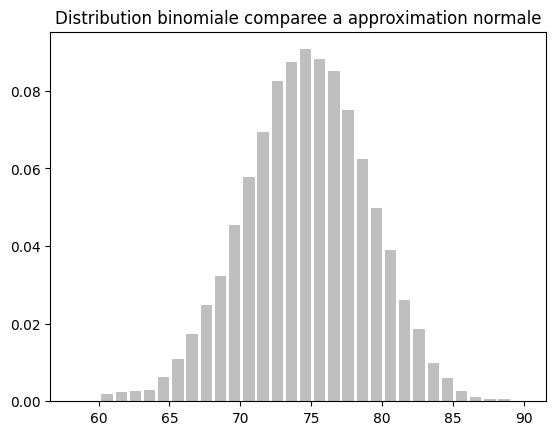

In [48]:
make_hist(0.75, 100, 10000)


### Satistique: Hypothese et inference

In [49]:
def normal_approximation_to_binomial(n, p):
    """Trouvons mu et sigma correspondant a Binomiale(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma


In [50]:
# le cdf normal est la probabilite que la variable soit en dessous d'un seuil
normal_probability_below = normal_cdf


In [51]:
# au-dessus du seuil si elle n'est pas sous le seuil
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)


In [52]:
# entre les deux si inferieure a hi, mais pas inferieure a lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)


In [53]:
# a l'exterieur si elle n'est pas entre les deux 
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)


In [54]:
def norma_upper_bound(probability, mu=0, sigma=1):
    """retourne la valeur de z pour laquelle P(Z <= z) = probabilite"""
    return inverse_normal_cdf(probability, mu, sigma)


In [55]:
def normal_lower_bound(probability, mu=0, sigma=1):
    """retourne la valeur z pour laquelle P(Z >= z) = probabilite"""
    return inverse_normal_cdf(1 -probability, mu, sigma)


In [56]:
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """retourne les limites symetriques (par rapport a la moyenne) qui contiennent la probabilite specifique"""
    tail_probability = (1 - probability) / 2

    # pour la limite superieure, tail_probability doit etre en dessus
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # pour la limite inferieure, tail_probability doit etre en dessous
    lower_bound = norma_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound


In [57]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print("Approximation esperance: ", mu_0, "Ecart-type: ", sigma_0)


Approximation esperance:  500.0 Ecart-type:  15.811388300841896


In [58]:
normal_two_sided_bounds(0.95, mu_0, sigma_0)


(469.01026640487555, 530.9897335951244)

In [59]:
# les limites a 95% sur la base de l'hypothese que p vaut 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print("hypothese que p vaut 0.5: ",lo, hi)

# mu et sigma sur la base de p = 0.55
mu_1, sigm_1 = normal_approximation_to_binomial(1000, 0.55)

# une erreur de type 2 signifie que nous n'avons pas reussi a rejeter l'hypothese nulle
# ce qui se produira quand X est encore dans notre intervalle d'origine (calcule sur la base de p = 0.5)
type_2_probability = normal_probability_between(lo, hi, mu_1, sigm_1)
power = 1 - type_2_probability


hypothese que p vaut 0.5:  469.01026640487555 530.9897335951244


In [60]:
hi = norma_upper_bound(0.95, mu_0, sigma_0)


In [61]:
hi


526.0073585242053

In [62]:
type_2_probability = normal_probability_below(hi, mu_1, sigm_1)
power = 1 -type_2_probability


In [63]:
power


0.9363794803307173

### P-value

In [64]:
def two_side_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # si x est plus grand que l'esperance, la queue de distribution est ce qui est superieur a x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # si x est inferieur a l'esperance, la queue de distribution est ce qui est inferieur
        # a x
        return 2 * normal_probability_below(x, mu, sigma)


In [65]:
two_side_p_value(529.5, mu_0, sigma_0)


0.06207721579598835

In [66]:
upper_p_value = normal_probability_above
lowe_p_value = normal_probability_below


In [67]:
upper_p_value(524.5, mu_0, sigma_0)


0.06062885772582072

In [68]:
upper_p_value(526.5, mu_0, sigma_0)


0.04686839508859242

### L'intervalle de confiance

In [69]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)


In [70]:
sigma


0.015791611697353755

In [71]:
normal_two_sided_bounds(0.95, mu, sigma)


(0.4940490278129096, 0.5559509721870904)

In [72]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat)/ 1000)
normal_two_sided_bounds(0.95, mu, sigma)


(0.5091095927295919, 0.5708904072704082)

### P-Hacking

In [73]:
def rund_experiment():
    """Lancer une piece non truquee 1000 fois, Vrai = face, Faux = pile"""
    return [random.random() < 0.5 for _ in range(1000)]


In [74]:
def reject_fairness(experiment):
    """utilisation des niveaux de signification de 5%"""
    num_heads = len([flip for flip in experiment if flip])

    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [rund_experiment() for _ in range(1000)]
num_rejections = len([
    experiment for experiment in experiments if reject_fairness(experiment)])
print(num_rejections)


46


### Effectuer un test A/B

In [75]:
def estimation_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma


In [76]:
def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimation_parameters(N_A, n_A)
    p_B, sigma_B = estimation_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)


In [77]:
z = a_b_test_statistic(1000, 200, 1000, 180)


In [78]:
z


-1.1403464899034472

In [79]:
two_side_p_value(z)


0.254141976542236

In [80]:
z = a_b_test_statistic(1000, 200, 1000, 150)
two_side_p_value(z)


0.003189699706216853

### L'inference de bayesienne

In [81]:
def B(alpha, beta):
    """une constante de normalisation pour que la probabilite totale soit 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)


In [82]:
def beta_pdf(x, alpha, beta):
    if x <= 0 or x >= 1:
        return 0
    return x ** (alpha - 1) * (1  - x) ** (beta - 1) / B(alpha, beta)


* `Note`
- le fait que la distribution a posteriori suive la loi beta n'a rien d'une coincidence. Le nombre de retombees `face` est donne par une distribution binomiale et la loi beta est le conjugue a priori de la distribution binomiale. En d'autres termes, quand vous mettez a jour une beta a priori enn utilisant des observations de la binomiale correspondante, vous retournez la beta a posteriori

## Descente de gradient
`note:` Se vanter de qui on descend revient a se vanter de ce qu'on doit aux autres

In [83]:
def sum_of_squares(v):
    """Calculons la sommes des carres des elements dans v"""
    return sum(v_i ** 2 for v_i in v)


In [84]:
v = [1, 2, 3, 4]


In [85]:
sum(v)


10

* `Note`:
- Si une fonction possede un unique global, cette procedure le trouvera certainement. Si une fonction possede plusieurs minima locaux, la procedure pourrait conduire a designer celui qui n'est pas le minimum global; dans le cas, il faut recommencer a partir de differents points de depart. Si une fonction ne possede pas de minimum, la procedure peut se poursuivre sans fin.

### Estimation du gradient

In [86]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h


In [87]:
def square(x):
    return x * x


In [88]:
def derivative(x):
    return 2 * x


In [89]:
from re import *


In [90]:
from functools import partial


In [91]:
derivative_estimate = partial(difference_quotient, square, h=0.00001)


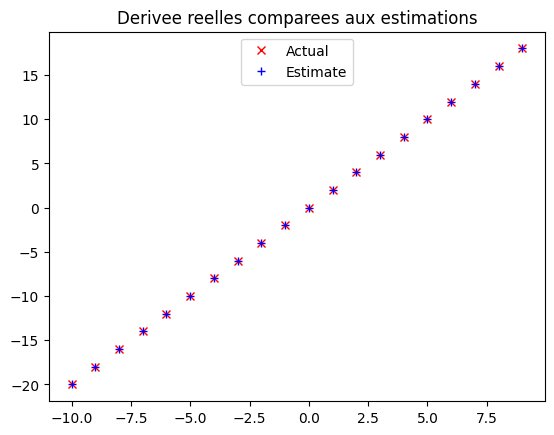

In [92]:
# graphique pour prouver que ce sont fondamental les memes
x = range(-10, 10)
plt.title("Derivee reelles comparees aux estimations")
plt.plot(x, list(map(derivative, x)), 'rx', label="Actual")
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()


In [93]:
def partial_difference_quotient(f, v, i, h):
    """Calcule le ieme quotient partiel des differences de f a v"""
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)] # ajoute h pour ajuster le ieme element de v
    return (f(w) - f(v)) / h


In [94]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]


In [95]:
def step(v, direction, step_size):
    """se deplacer de step_size dans la direction v"""
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]


In [96]:
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]


In [97]:
# choisir un point de depart Aléatoire 
v = [random.randint(-10, 10) for i in range(3)]


In [98]:
tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) # calculer le gradient a v
    next_v = step(v, gradient, -0.01) # effectuer un deplacement negatif
    if distance(next_v, v) < tolerance: # s'Arrêter en cas de convergence
        break
    v = next_v


In [99]:
v


[4.5336994434236267e-07, -2.720219666054177e-06, -4.080329499081268e-06]

In [100]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]


In [101]:
def safe(f):
    """Retourne une nouvelle fonction qui est la Même que f,
        a la difference Près quelle renvoie l'infini quand f produit une erreur"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf') # signifie "infini"
    return safe_f


## Synthèse 

In [102]:
def minimize_batch(target_fn, gradient_fn, theta_o, tolerance=0.000001):
    """Utilise la descente du gradient pour trouver le theta qui minimise la fonction cible"""
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.0001, 0.00001]
    theta = theta_o # initialise theta
    target_fn = safe(target_fn) # version Sûre de target_fn
    value = target_fn(theta) # valeur que nous minimisons

    while True:
        gradient  = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size) for step_size in step_sizes]

        # choisir celui qui minimise la fonction d'erreur
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # Arrêter en cas de (convergence)
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value


In [103]:
def negate(f):
    """Retourne une fonction qui renvoie -f(x) pour toute Entrée x"""
    return lambda *args, **kwargs: -f(*args, ** kwargs)

def negate_all(f):
    """La Mêmes chose quand f Retourne une liste de nombres"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn), negate_all(gradient_fn), theta_0, tolerance)


### La descente du gradient Stochastiques 


In [104]:
def in_random_order(data):
    """Generation qui retourne les elements de Donner dans un ordre aleatoire"""
    indexes = [i for i, _ in enumerate(data)] # Crée une liste d'index 
    random.shuffle(indexes for i in indexes)


In [105]:
def minimize_stochatic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = zip(x, y)
    theta = theta_0             # Prédiction initial
    alpha = alpha_0             # Valeur de Déplacement initiale' 
    mini_theta, min_value = None, float("inf") # le minimum jusqu'a Présent 
    iterations_with_no_improvement = 0

    # Si on effectue 100 Itération sans constater d'amelioration, Arrêter
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)

        if value < min_value:
            # si on a trouve un nouveau minimum, le conserver
            # et revenir a la valeur de deplacement d'origine
            mini_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0

        else:
            # sinon il n'y a pas d'amelioration, il faut donc diminuer la valeur de deplacement
            iterations_with_no_improvement += 1
            alpha *= 0.9

            # et prendre un deplacement de la valeur du gradient pour chaque Donner Isolée 
            for x_i, y_i in in_random_order(data):
                gradient_i = gradient_fn(x_i, y_i, theta)
                theta = vector_substract(theta, scalar_multiply(alpha, gradient_i))
        return mini_theta


In [106]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochatic(negate(target_fn), negate_all(gradient_fn), x, y, theta_0, alpha_0)


### Collecte des Données 

In [107]:
import sys, re


- sys.argv est la liste des arguments de ligne de commande
- sys.argv[0] est le nom du programme
- sys.argv[1] sera le regex specifie pour la ligne de commande

In [108]:
# se script lire les lignes de textes et restitue celles qui corresponde a l'expression rationnelle
regex = sys.argv[1]

# pour chaque ligne Passée dans le script
for line in sys.stdin:
    # si elle correspoau regex, l'ecrire dans stdout
    if re.search(regex, line):
        sys.stdout.write(line)


KeyboardInterrupt: 

In [ ]:
# et celle ci compte les lignes Reçu et ecrit le resultat
import sys

count = 0
for line in sys.stdin:
    count +=1

print(count)


#### Voici le script complet

In [ ]:
from collections import Counter

# passer le nombre de mots en premier argument
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_word")
    sys.exit(1) # un code non zero en sortie indique une erreur

counter = Counter(word.lower() 
                  for line in sys.stdin
                  for word in line.strip().split() # separer a partir des espaces
                  if word)                       # sauter les mots (words) vides )
for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")


#### Lecture de fichiers
##### Les fondamentaux des fichiers texte

In [ ]:
# 'r' signifie lecture seule (read-only)
file_for_reading = open('reading_file.txt', 'r')

# 'w' signifie ecrire (write) - Détruit le fichier existant (append)
file_for_appending = open('reading_file.txt', 'a')

# n'ouliez pas de fermer les fichier quand vous avez fini
file_for_appending.close()


In [ ]:
# comment faire en sorte de pas oulier la fermeture du fichier
with open('reading_file.txt', 'r') as f:
    data = file_for_reading(f)


TypeError: '_io.TextIOWrapper' object is not callable

In [ ]:
import csv


In [ ]:
with open('stock_limite.csv', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        

Error: iterator should return strings, not bytes (the file should be opened in text mode)

In [ ]:
data = csv.reader('stock_limite.csv', delimiter='\t')


In [ ]:
for row in data:
    date = list(row[0])
    symbol = list(row[1])
    price = list(row[2])


IndexError: list index out of range

In [ ]:
def bucketsize(point, bucket_size):
    """dirige le point vers le prochain plus petit multiple de bucket_size"""
    return bucket_size * math.floor(point / bucket_size)


In [114]:
def make_histogram(points, bucket_size):
    """separe les points et compte le nombre de points dans chaque tranche"""
    histogram = {}
    for point in points:
        bucket = bucketsize(point, bucket_size)
        histogram[bucket] = histogram.get(bucket, 0) + 1
    return histogram

    

In [115]:
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()


In [112]:
random.seed(0)

# uniforme entre - 100 et 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# distribution normale avec esperance 0 et ecart-type 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(100000)]


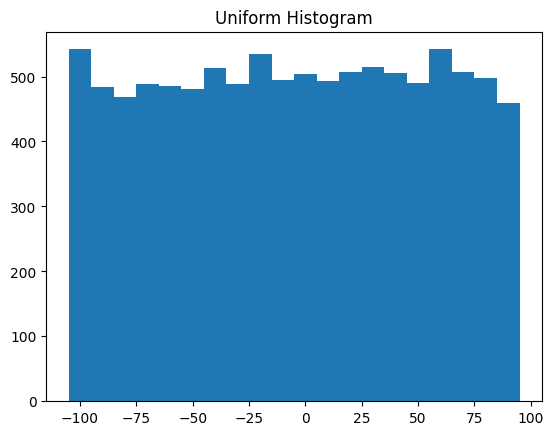

In [116]:
plot_histogram(uniform, 10, "Uniform Histogram")


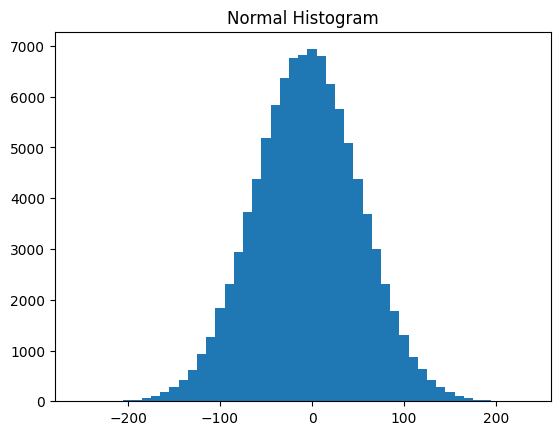

In [117]:
plot_histogram(normal, 10, "Normal Histogram")


In [118]:
def random_normal():
    """retourne un graphique aleatoire a partir d'une distribution normale"""
    return inverse_normal_cdf(random.random())
xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]


In [121]:
plot_histogram(ys1, ys2, "Hist de loi")


TypeError: unsupported operand type(s) for /: 'float' and 'list'

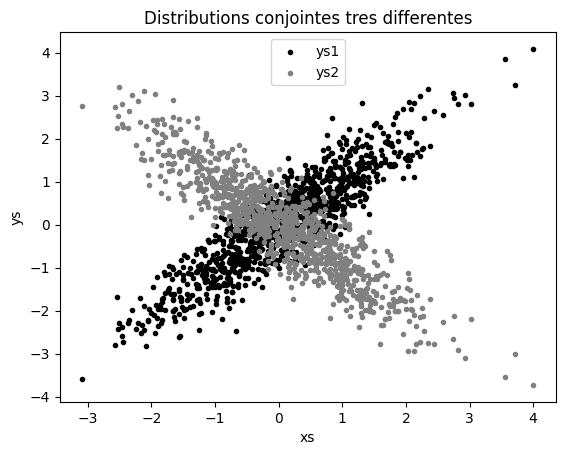

In [122]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Distributions conjointes tres differentes")
plt.show()


In [123]:
print(correlation(xs, ys1))
print(correlation(xs, ys2))


0.9040123598990163
-0.9023983845297132


In [124]:
def correlation_matrix(data):
    """Retourne la matrice num_column x num_column dont l'Entrée de rang (i, j) est la correlation entre les colonnes i et j des Données """
    _, num_columns = shape(data)

    def matrix_entry(i, j):
        return correlation(get_colmn(data, i), get_colmn(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd 
import numpy as np 


In [ ]:
np.random.seed(42)  # pour avoir toujours les mêmes nombres
data = {
    "label": [f"series {i}" for i in np.random.randint(0, 4, 20)],
    "value": np.random.randint(1, 100, 20)
}

df = pd.DataFrame(data)


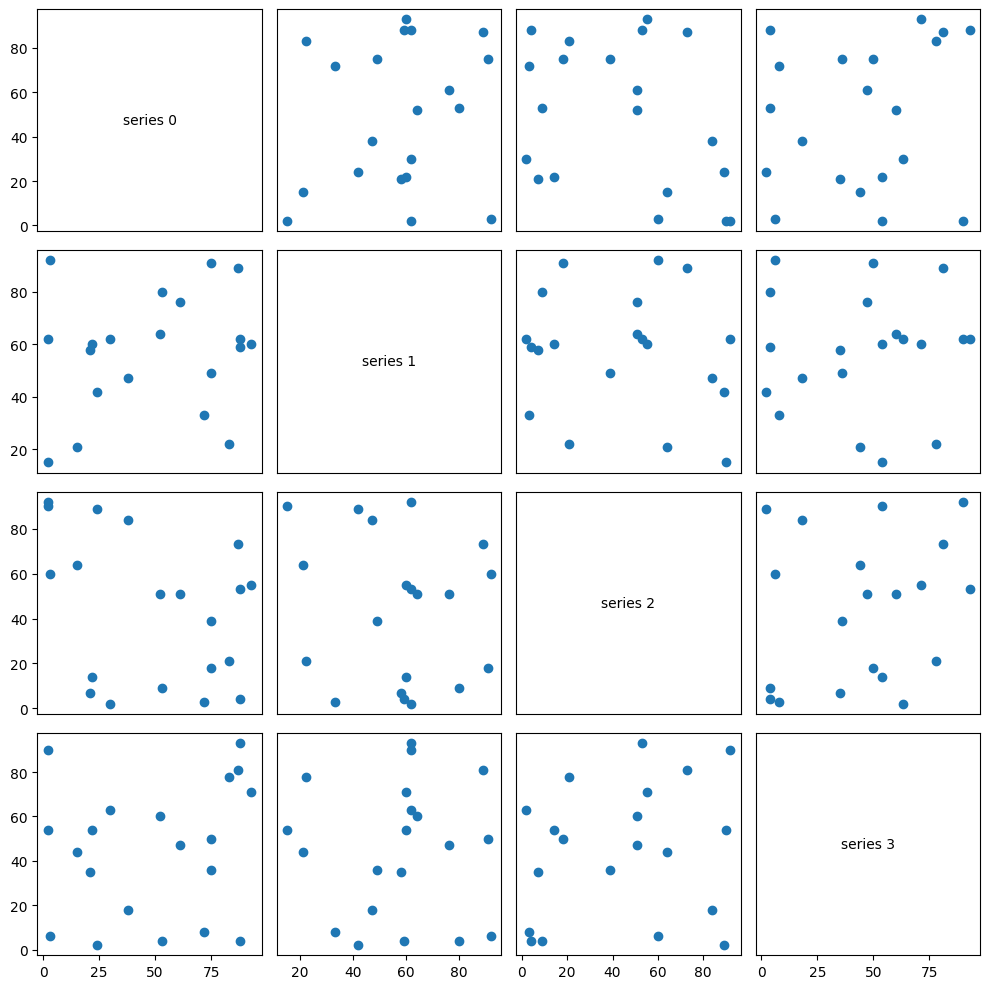

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemple de dataset avec 4 colonnes numériques
np.random.seed(42)
data = pd.DataFrame({
    "series 0": np.random.randint(1, 100, 20),
    "series 1": np.random.randint(1, 100, 20),
    "series 2": np.random.randint(1, 100, 20),
    "series 3": np.random.randint(1, 100, 20),
})

num_columns = data.shape[1]
fig, ax = plt.subplots(num_columns, num_columns, figsize=(10, 10))

for i in range(num_columns):
    for j in range(num_columns):
        if i != j:
            ax[i][j].scatter(data.iloc[:, j], data.iloc[:, i])
        else:
            ax[i][j].annotate(
                data.columns[i],
                (0.5, 0.5),
                xycoords='axes fraction',
                ha='center',
                va='center'
            )

        # cache les labels sauf en bas et à gauche
        if i < num_columns - 1:
            ax[i][j].xaxis.set_visible(False)
        if j > 0:
            ax[i][j].yaxis.set_visible(False)

# corrige les limites pour que le texte ne soit pas écrasé
ax[-1, -1].set_xlim(ax[0, -1].get_xlim())
ax[0, 0].set_ylim(ax[0, 1].get_ylim())

plt.tight_layout()
plt.show()


### Nettoyage et transformation

In [133]:
def parse_row(input_row, parsers):
    """Pour une liste Données de parseurs (certains d'entre eux Éventuellement a None) appliquer le bon parseur a chaque Élément colonne de la ligne en Entrée """
    return [parser(value) if parser is not None else value 
            for value, parser in zip(input_row, parsers)]


In [ ]:
def parse_rows_with(reader, parsers):
    """encapsule un lecteur pour appliquer les parseurs a chacune de ses lignes"""
    for row in reader:
        yield(parsers(row, parsers))


In [135]:
def try_or_none(f):
    """enveloppe f pour retourner None si f declenche une exception suppose que f prend seulement une Entrée """
    def f_or_none(x):
        try: return f(x)
        except: return None
    return f_or_none


In [ ]:
def parse_row(input_row, parsers):
    return [try_or_none(parser)(value) if parser is not None 
            else value 
            for value, parser in zip(input_row, parsers)]
